Dataset Head:
   Customer_ID     Website                        review  score  Label
0            0     Twitter                            Op      5      1
1            1   Instagram                          Good      5      1
2            2     Youtube  My paytm wallet app is open       4      1
3            3  Play Store                         Super      5      1
4            4     Twitter                      The best      5      1

Missing Values:
Customer_ID    0
Website        0
review         0
score          0
Label          0
dtype: int64


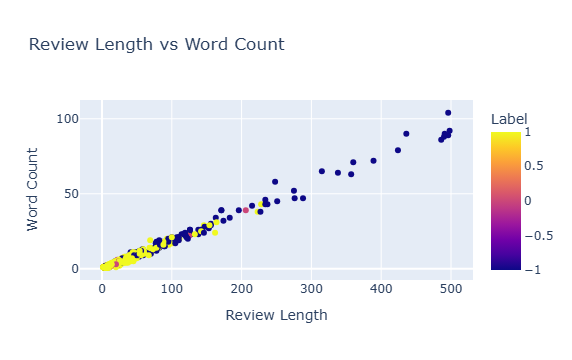

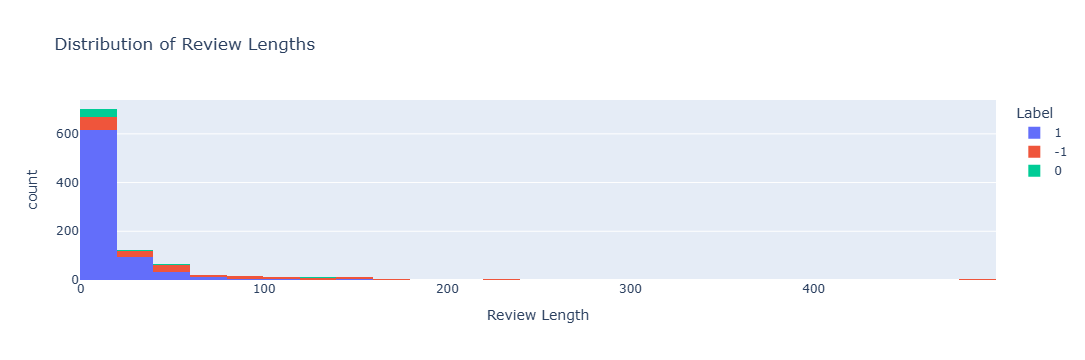

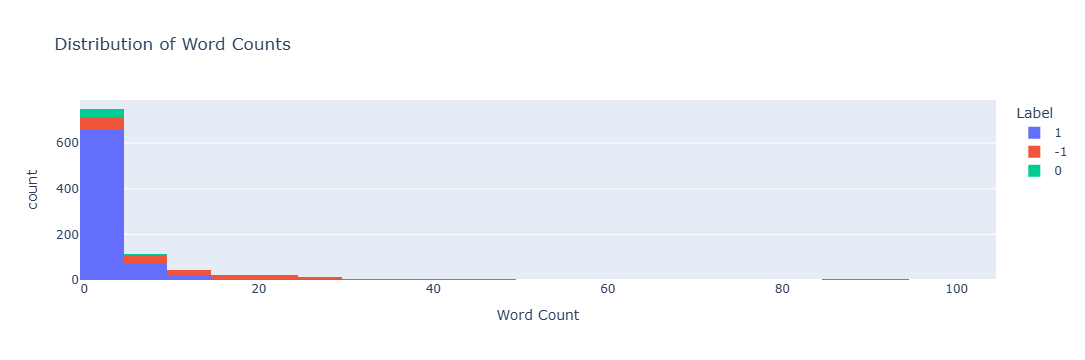


Top 20 Bigrams:
                  count
nice app             27
good app             26
ðÿ ðÿ                17
good service         12
customer care        12
worst app            11
paytm wallet          8
best app              7
easy use              7
using paytm           6
customer support      6
paytm app             6
16 point              5
thanks paytm          5
good application      5
good payment          5
solve problem         5
bad app               5
money gone            4
paytm ipo             4


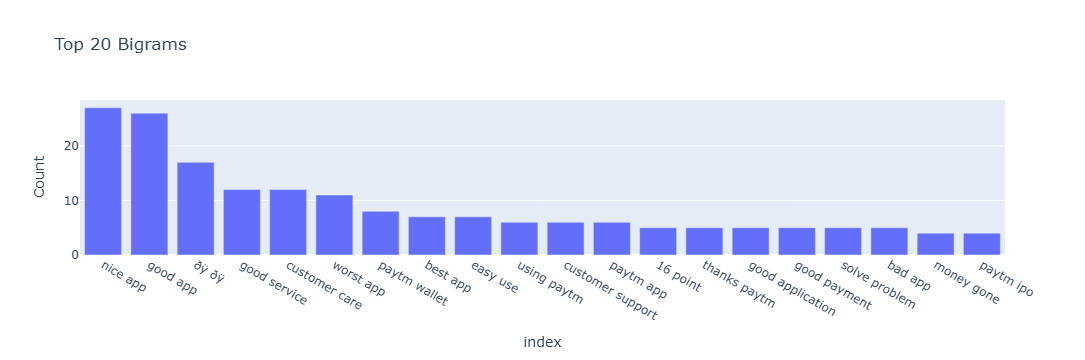


Top 20 Trigrams:
                        count
ðÿ ðÿ ðÿ                   14
bad app booked              3
customer care service       3
app booked cylinder         3
paytm fixed deposit         3
super super super           3
booked cylinder paytm       2
use na kre                  2
cylinder paytm 14           2
till showing booking        2
able track money            2
kar dete hai                2
paytm 14 nov                2
chuna laga diya             2
app easy use                2
fraud company ipo           2
booking able track          2
nice good app               2
nov came till               2
worst experience paytm      2


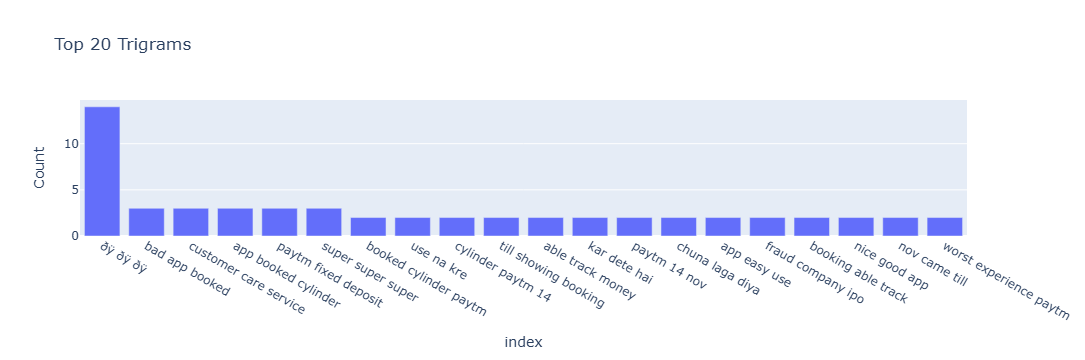

In [24]:
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

# Use data from Sheet1
file_path = 'Abhiram_paytm.xlsx'  # Update this with your CSV file path
df = pd.read_excel(file_path)

# Basic EDA
print("Dataset Head:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

# Add review length and word count
df['review_length'] = df['review'].apply(len)
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

# Interactive scatter plot for review length vs word count
fig = px.scatter(
    df, 
    x='review_length', 
    y='word_count', 
    color='Label',
    title='Review Length vs Word Count',
    labels={'review_length': 'Review Length', 'word_count': 'Word Count'},
    hover_data=['review']
)
fig.show()

# Interactive histogram for review lengths
fig_length = px.histogram(
    df, 
    x='review_length', 
    nbins=30, 
    color='Label',
    title='Distribution of Review Lengths',
    labels={'review_length': 'Review Length'}
)
fig_length.show()

# Interactive histogram for word counts
fig_word_count = px.histogram(
    df, 
    x='word_count', 
    nbins=30, 
    color='Label',
    title='Distribution of Word Counts',
    labels={'word_count': 'Word Count'}
)
fig_word_count.show()

# N-gram analysis function
def get_ngrams(comments, n=2, top_n=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(comments)
    ngram_counts = ngrams.sum(axis=0)
    ngram_features = vectorizer.get_feature_names_out()
    
    # Create a DataFrame of n-grams and their counts
    ngram_df = pd.DataFrame(ngram_counts.A1, index=ngram_features, columns=['count'])
    return ngram_df.sort_values(by='count', ascending=False).head(top_n)

# Generate and display bigrams
reviews = df['review'].dropna()
bigrams = get_ngrams(reviews, n=2, top_n=20)  # Get top 20 bigrams

print("\nTop 20 Bigrams:")
print(bigrams)

# Bar plot for bigrams
fig_bigrams = px.bar(
    bigrams, 
    x=bigrams.index, 
    y='count',
    title='Top 20 Bigrams',
    labels={'x': 'Bigrams', 'count': 'Count'}
)
fig_bigrams.show()

# Generate and display trigrams
trigrams = get_ngrams(reviews, n=3, top_n=20)  # Get top 20 trigrams

print("\nTop 20 Trigrams:")
print(trigrams)

# Bar plot for trigrams
fig_trigrams = px.bar(
    trigrams, 
    x=trigrams.index, 
    y='count',
    title='Top 20 Trigrams',
    labels={'x': 'Trigrams', 'count': 'Count'}
)
fig_trigrams.show()


In [16]:
pip install pandas nltk matplotlib openpyxl


Note: you may need to restart the kernel to use updated packages.


In [18]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

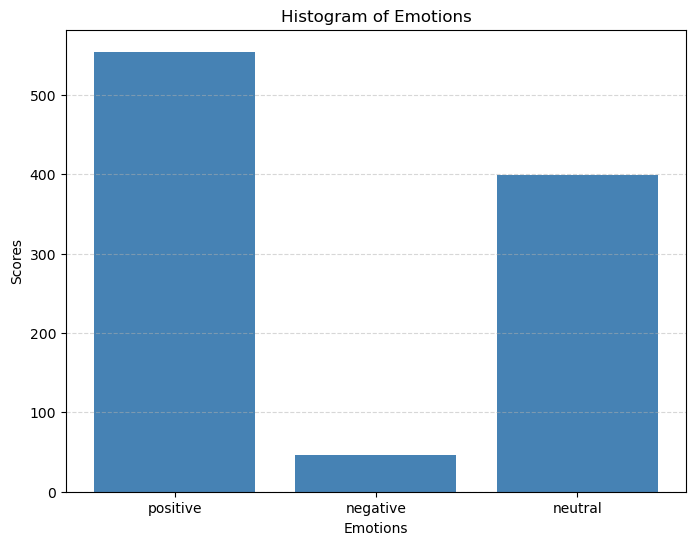

In [20]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the dataset from Sheet1 of the Excel file
file_path = 'Abhiram_paytm.xlsx'  # Update this with your CSV file path
df = pd.read_excel(file_path)

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Step 2: Perform sentiment analysis on the 'review' column
df['sentiment_scores'] = df['review'].apply(lambda x: sid.polarity_scores(x))

# Extract individual sentiment scores
df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])

# Step 3: Sum sentiment scores for each emotion
emotion_totals = {
    'positive': df['positive'].sum(),
    'negative': df['negative'].sum(),
    'neutral': df['neutral'].sum()
}

# Convert to data frame for plotting
emotion_df = pd.DataFrame(list(emotion_totals.items()), columns=['emotion', 'score'])

# Step 4: Create a histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(emotion_df['emotion'], emotion_df['score'], color='steelblue')
plt.title("Histogram of Emotions")
plt.xlabel("Emotions")
plt.ylabel("Scores")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Optional: Export the sentiment scores to a CSV file
df[['review', 'positive', 'negative', 'neutral']].to_csv('sentiment_scores.csv', index=False)
